# Atividade 2 - Visão Computacional

O entregável de toda esta atividade vai ser um código-fonte em C. 

Encorajamos vocês a fazerem vídeos demonstrando o resultado e a postar (pode ser privadamente) no YouTube



Você deve ter uma folha com o padrão anexo. 
*Dica:* Se não tiver, é possível fazer também com um tablet ou *smartphone*
 
<img src="folha_atividade.png" width=300>

In [2]:
import cv2
import numpy as np
import time as t
from matplotlib import pyplot as plt
from ipywidgets import widgets, interact, interactive, FloatSlider, IntSlider
import auxiliar as aux
import math

## Parte 1 - calibração

Ouça a explicação do professor sobre o modelo de câmera *pinhole*  e desenhe a medida $f$ que separa o plano focal da pupila da câmera

Detalhe como calculou $f$

True

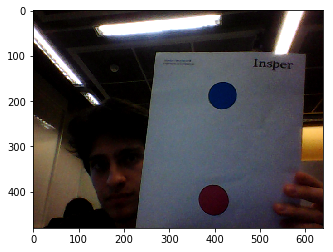

In [2]:
webcam = cv2.VideoCapture(0)
t.sleep(3)
val, image = webcam.read()
webcam.release()
plt.imshow(image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite("Pinguim.jpg", image_bgr)

A distância focal foi calculada a partir de uma regra de três. Temos o ho (distância entre os centros da circunfrência fisicamente) proporcional a hi (distância entre os centros virtualmente em pixels) e a distância entre o objeto e a câmera é proporcional a distância focal. Dessa forma f = 535,714 px.

In [3]:
ho = 14
d = 25
hi = 300

f = (hi*d)/ho
print(f)

535.7142857142857


## Parte 2

Modifique um dos exemplos `draw_circles_video.py` ou `videoplay.py` para passar a ler dados da webcam e identificar o círculo magenta e o círculo ciano, usando o `inRange`

In [3]:
#Ciano
colorpicker = widgets.ColorPicker(
    concise=False,
    description='Escolha uma cor',
    value='#133b76',
    disabled=False
)

hsv1, hsv2 = aux.ranges(colorpicker.value)


#Magenta
colorpicker1 = widgets.ColorPicker(
    concise=False,
    description='Escolha uma cor',
    value='#8f213c',
    disabled=False
)

hsv3, hsv4 = aux.ranges(colorpicker1.value)



print("ciano: ", hsv1, hsv2)
print("Magenta: ", hsv3, hsv4)

ciano:  [98 50 50] [108 255 255]
Magenta:  [163  50  50] [173 255 255]


In [4]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

lower = 0
upper = 1

# Returns an image containing the borders of the image
# sigma is how far from the median we are setting the thresholds
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged



while(True):
    # Capture frame-by-frame
    print("New frame")
    ret, frame = cap.read()
    
  
    
    

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # A gaussian blur to get rid of the noise in the image
    blur = cv2.GaussianBlur(gray,(5,5),0)
    #blur = gray
    # Detect the edges present in the image
    bordas = auto_canny(blur)


    circles = []


    # Obtains a version of the edges image where we can draw in color
    bordas_color = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)
    
    #Cor magenta e ciano especificados
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask1 = cv2.inRange(hsv,hsv1,hsv2) #Ciano
    mask2 = cv2.inRange(hsv, hsv3, hsv4) #Magenta
    mask = cv2.bitwise_or(mask1, mask2)
    cor = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,np.ones((10, 10)))
    target = cv2.bitwise_and(frame,frame, mask=cor)

   

    # Display the resulting frame
    cv2.imshow('Detector de circulos',target)
    print("No circles were found")
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New fram

New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New fram

No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circl

No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circl

New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New fram

No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circl

New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New fram

No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circl

New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New fram

No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circl

No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circl

No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circl

No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circl

New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found
New frame
No circles were found


## Parte 3

Assumindo que a folha se mantém sempre paralela ao plano de imagem da câmera, imprima a distância entre a folha e sua câmera

In [5]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

lower = 0
upper = 1

# Returns an image containing the borders of the image
# sigma is how far from the median we are setting the thresholds
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged



while(True):
    # Capture frame-by-frame
    #print("New frame")
    ret, frame = cap.read()
    
  
    
    

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # A gaussian blur to get rid of the noise in the image
    blur = cv2.GaussianBlur(gray,(5,5),0)
    #blur = gray
    # Detect the edges present in the image
    bordas = auto_canny(blur)

    
    circles = []


    # Obtains a version of the edges image where we can draw in color
    
    bordas_color = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)
    
    #Cor magenta e ciano especificados
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask1 = cv2.inRange(hsv,hsv1,hsv2) #Ciano
    mask2 = cv2.inRange(hsv, hsv3, hsv4) #Magenta
    mask = cv2.bitwise_or(mask1, mask2)
    cor = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,np.ones((3, 3)))
    target = cv2.bitwise_and(frame,frame, mask=cor)

    
    
   
    circles = None
    circles=cv2.HoughCircles(bordas,cv2.HOUGH_GRADIENT,2,40,param1=50,param2=100,minRadius=5,maxRadius=60)
    
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        
        for i in circles[0,:]:
#             print(circles)
            # draw the outer circle
            # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
            cv2.circle(target,(i[0],i[1]),i[2],(0,255,0),2)
            # draw the center of the circle
            cv2.circle(target,(i[0],i[1]),2,(0,0,255),3)
            
        if len(circles[0]) == 2:
            center1 = (circles[0][0][0], circles[0][0][1])
            center2 = (circles[0][1][0], circles[0][1][1])
            cv2.line(target, center1, center2,(255,0,0),5)


            x1 = int(circles[0][0][0])
            y1 = int(circles[0][0][1])
            
            
            
            x2 = int(circles[0][1][0])
            y2 = int(circles[0][1][1])

            
            
            difx = x2 - x1
            
            dify = y2 - y1

            ho = 14
            hi = (difx**2 + dify**2)**(1.0/2.0)
            f = 535.7142857142857
            d = (f*ho)/hi



            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(target,'Distance: {0}'.format(d),(0,25), font, 1,(255,255,255),2,cv2.LINE_AA)

            

    # Draw a diagonal blue line with thickness of 5 px
    # cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
    cv2.line(bordas_color,(0,0),(511,511),(255,0,0),5)

    # cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
    cv2.rectangle(bordas_color,(384,0),(510,128),(0,255,0),3)



    # Display the resulting frame
    cv2.imshow('Detector de circulos',target)
    #print("No circles were found")
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

## Parte 4

Trace uma linha entre os centros do círculo magenta e do círculo ciano.

Imprima na tela o ângulo entre esta linha e a horizontal

In [6]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

lower = 0
upper = 1

# Returns an image containing the borders of the image
# sigma is how far from the median we are setting the thresholds
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged



while(True):
    # Capture frame-by-frame
    #print("New frame")
    ret, frame = cap.read()
    
  
    
    

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # A gaussian blur to get rid of the noise in the image
    blur = cv2.GaussianBlur(gray,(5,5),0)
    #blur = gray
    # Detect the edges present in the image
    bordas = auto_canny(blur)

    
    circles = []


    # Obtains a version of the edges image where we can draw in color
    
    bordas_color = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)
    
    #Cor magenta e ciano especificados
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask1 = cv2.inRange(hsv,hsv1,hsv2) #Ciano
    mask2 = cv2.inRange(hsv, hsv3, hsv4) #Magenta
    mask = cv2.bitwise_or(mask1, mask2)
    cor = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,np.ones((3, 3)))
    target = cv2.bitwise_and(frame,frame, mask=cor)

    
    
   
    circles = None
    circles=cv2.HoughCircles(bordas,cv2.HOUGH_GRADIENT,2,40,param1=50,param2=100,minRadius=5,maxRadius=60)
    
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        
        for i in circles[0,:]:
#             print(circles)
            # draw the outer circle
            # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
            cv2.circle(target,(i[0],i[1]),i[2],(0,255,0),2)
            # draw the center of the circle
            cv2.circle(target,(i[0],i[1]),2,(0,0,255),3)
            
        if len(circles[0]) == 2:
            center1 = (circles[0][0][0], circles[0][0][1])
            center2 = (circles[0][1][0], circles[0][1][1])
            cv2.line(target, center1, center2,(255,0,0),5)


            x1 = int(circles[0][0][0])
            y1 = int(circles[0][0][1])
            
            
            
            x2 = int(circles[0][1][0])
            y2 = int(circles[0][1][1])

            
            #Distância
            difx = x2 - x1
            dify = y2 - y1

            ho = 14
            hi = (difx**2 + dify**2)**(1.0/2.0)
            f = 535.7142857142857
            d = (f*ho)/hi
            
            
            #Ângulo entre a linha e a horizontal
            sen = abs(dify)/hi
            asin = math.degrees(math.asin(sen))
            



            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(target,'Distance: {0}'.format(d),(0,25), font, 1,(255,255,255),2,cv2.LINE_AA)
            cv2.putText(target,'Angulo: {0}'.format(asin),(0,55), font, 1,(255,255,255),2,cv2.LINE_AA)
            

            

    # Draw a diagonal blue line with thickness of 5 px
    # cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
    cv2.line(bordas_color,(0,0),(511,511),(255,0,0),5)

    # cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
    cv2.rectangle(bordas_color,(384,0),(510,128),(0,255,0),3)



    # Display the resulting frame
    cv2.imshow('Detector de circulos',target)
    #print("No circles were found")
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

## Parte 5

Usando transformada de Hough, desenhe um círculo sobre o círculo ciano e outro sobre o círculo magenta.

**Desafio bônus**: ser capaz de eliminar circulos espúrios (aqueles que não são os da folha)

In [7]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

lower = 0
upper = 1

# Returns an image containing the borders of the image
# sigma is how far from the median we are setting the thresholds
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged



while(True):
    # Capture frame-by-frame
    #print("New frame")
    ret, frame = cap.read()
    
  
    
    

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # A gaussian blur to get rid of the noise in the image
    blur = cv2.GaussianBlur(gray,(5,5),0)
    #blur = gray
    # Detect the edges present in the image
    bordas = auto_canny(blur)

    
    circles = []


    # Obtains a version of the edges image where we can draw in color
    
    bordas_color = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)
    
    #Cor magenta e ciano especificados
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask_cyano = cv2.inRange(hsv,hsv1,hsv2) #Ciano
    mask_magenta = cv2.inRange(hsv, hsv3, hsv4) #Magenta
    mask = cv2.bitwise_or(mask_cyano, mask_magenta)
    cor = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,np.ones((3, 3)))
    target = cv2.bitwise_and(frame,frame, mask=cor)

    
    cyano_magenta = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
    canny_edge = cv2.Canny(cyano_magenta, 50, 240)
   
    circles = None
    circles=cv2.HoughCircles(canny_edge,cv2.HOUGH_GRADIENT,2,40,param1=50,param2=100,minRadius=5,maxRadius=60)
    
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        
        for i in circles[0,:]:
#             print(circles)
            # draw the outer circle
            # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
            cv2.circle(target,(i[0],i[1]),i[2],(0,255,0),2)
            # draw the center of the circle
            cv2.circle(target,(i[0],i[1]),2,(0,0,255),3)
            
            if len(circles[0]) == 2:
                
                cv2.circle(target,(i[0],i[1]),i[2],(255,0,0),-2)
                
            
        if len(circles[0]) == 2:
            center1 = (circles[0][0][0], circles[0][0][1])
            center2 = (circles[0][1][0], circles[0][1][1])
            cv2.line(target, center1, center2,(255,0,0),5)


            x1 = int(circles[0][0][0])
            y1 = int(circles[0][0][1])
            
            
            
            x2 = int(circles[0][1][0])
            y2 = int(circles[0][1][1])

            
            #Distância
            difx = x2 - x1
            dify = y2 - y1

            ho = 14
            hi = (difx**2 + dify**2)**(1.0/2.0)
            f = 535.7142857142857
            d = (f*ho)/hi
            
            
            #Ângulo entre a linha e a horizontal
            sen = abs(dify)/hi
            asin = math.degrees(math.asin(sen))
            



            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(target,'Distance: {0}'.format(d),(0,25), font, 1,(255,255,255),2,cv2.LINE_AA)
            cv2.putText(target,'Angulo: {0}'.format(asin),(0,55), font, 1,(255,255,255),2,cv2.LINE_AA)
            
            
            

            

    # Draw a diagonal blue line with thickness of 5 px
    # cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
    cv2.line(bordas_color,(0,0),(511,511),(255,0,0),5)

    # cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
    cv2.rectangle(bordas_color,(384,0),(510,128),(0,255,0),3)



    # Display the resulting frame
    cv2.imshow('Detector de circulos',target)
    #print("No circles were found")
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

## Parte 6

Usando `SIFT`, identifique o escrito *Insper* na folha

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from math import pi
import matplotlib.cm as cm

In [9]:
# Número mínimo de pontos correspondentes
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while(True):
    ret, frame = cap.read()

    
    MIN_MATCH_COUNT = 10

    ref = cv2.imread('insper.png',0)      # Gabarito / Imagem a procurar


    # Versões RGB das imagens, para plot
    ref_rgb = cv2.cvtColor(ref, cv2.COLOR_GRAY2RGB)
    webc = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Cria o detector SIFT
    sift = cv2.xfeatures2d.SIFT_create()

    # Encontra os pontos únicos (keypoints) nas duas imagems
    kp1, des1 = sift.detectAndCompute(ref ,None)
    kp2, des2 = sift.detectAndCompute(webc,None)

    # Configurações do algoritmo FLANN que compara keypoints e ver correspondências - não se preocupe com isso
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)

    # Configura o algoritmo de casamento de features que vê *como* o objeto que deve ser encontrado aparece na imagem
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Tenta fazer a melhor comparacao usando o algoritmo
    matches = flann.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)


    if len(good)>MIN_MATCH_COUNT:
        # Separa os bons matches na origem e no destino
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)


        # Tenta achar uma trasformacao composta de rotacao, translacao e escala que situe uma imagem na outra
        # Esta transformação é chamada de homografia 
        # Para saber mais veja 
        # https://docs.opencv.org/3.4/d9/dab/tutorial_homography.html
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()



        h,w = ref.shape
        # Um retângulo com as dimensões da imagem original
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

        # Transforma os pontos do retângulo para onde estao na imagem destino usando a homografia encontrada
        dst = cv2.perspectiveTransform(pts,M)


        # Desenha um contorno em vermelho ao redor de onde o objeto foi encontrado
        img2b = cv2.polylines(frame,[np.int32(dst)],True,(255,0,0),3, cv2.LINE_AA)

    else:
        print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None

    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)

    # Vocês não precisam disto: desenham os pontos
   
    
    
    
    # Display the resulting frame
    cv2.imshow('Detector Insper',frame)
    #print("No circles were found")
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
        
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()



Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 1/10
Not enough matches are found - 1/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 0/10
Not enough matches are found - 2/10
Not enough matches are found - 10/10
Not enough matches are found - 9/10
Not enough matches are found - 8/10
Not enough matches are found - 7/10
Not enough matches are found - 4/10
Not enough matches are found - 7/10
Not enough matches are found - 8/10
Not enough matches are found - 7/10
Not enough matches are found - 10/10
Not enough matches are found - 1/10
Not enough matches are found - 9/10
Not enough matches are found - 0/10
Not enough matches are fou